In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Heart_disease_UCI_EDA.csv to Heart_disease_UCI_EDA (1).csv


In [ ]:
df= pd.read_csv("Heart_disease_UCI_EDA.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.528053,131.280528,245.134488,0.148515,0.514851,149.692244,0.326733,1.024422,1.468647,0.405941,0.445545,0.544554
std,9.082101,0.466011,0.500038,16.582241,47.552910,0.356198,0.500606,22.762004,0.469794,1.110127,0.499842,0.491886,0.497848,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,1.000000,170.000000,369.750000,1.000000,1.000000,202.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(303, 14)

In [ ]:
df1= df[:]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
#Creating Dummies of Categorical Variables and dropping 1st dummy variable

Catg_vars =['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
for i in Catg_vars:
    Catg_list = 'var'+'_'+i
    Catg_list = pd.get_dummies(df[i], drop_first=True, prefix = i)
    df1 = df1.join(Catg_list)
    df1 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    float64
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    float64
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  target     303 non-null    int64  
 14  sex_1      303 non-null    uint8  
 15  cp_1       303 non-null    uint8  
 16  fbs_1      303 non-null    uint8  
 17  restecg_1  303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_2    303 non-null    uint8  
 20  ca_1      

In [ ]:
#After Creating dummies and dropping 1st dummy now drop original variable
Catg_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
df_vars = df1.columns.values.tolist()

In [ ]:
to_keep = [i for i in df_vars if i not in Catg_vars] 
# keep only those which are not in the list of data_vars

In [ ]:
df_final = df1[to_keep]

In [ ]:
df_final.columns.values

array(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'fbs_1', 'restecg_1', 'exang_1', 'slope_2', 'ca_1',
       'thal_1'], dtype=object)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_1      303 non-null    uint8  
 7   cp_1       303 non-null    uint8  
 8   fbs_1      303 non-null    uint8  
 9   restecg_1  303 non-null    uint8  
 10  exang_1    303 non-null    uint8  
 11  slope_2    303 non-null    uint8  
 12  ca_1       303 non-null    uint8  
 13  thal_1     303 non-null    uint8  
dtypes: float64(3), int64(3), uint8(8)
memory usage: 16.7 KB


In [ ]:
X = df_final.loc[:, df_final.columns!= 'target']
y = df_final.loc[:, df_final.columns== 'target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   sex_1      303 non-null    uint8  
 6   cp_1       303 non-null    uint8  
 7   fbs_1      303 non-null    uint8  
 8   restecg_1  303 non-null    uint8  
 9   exang_1    303 non-null    uint8  
 10  slope_2    303 non-null    uint8  
 11  ca_1       303 non-null    uint8  
 12  thal_1     303 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 14.3 KB


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
''' Splitting the data into Train & Test (70-30 respectively) '''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
train = X_train.join(y_train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 137 to 172
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        212 non-null    int64  
 1   trestbps   212 non-null    int64  
 2   chol       212 non-null    float64
 3   thalach    212 non-null    float64
 4   oldpeak    212 non-null    float64
 5   sex_1      212 non-null    uint8  
 6   cp_1       212 non-null    uint8  
 7   fbs_1      212 non-null    uint8  
 8   restecg_1  212 non-null    uint8  
 9   exang_1    212 non-null    uint8  
 10  slope_2    212 non-null    uint8  
 11  ca_1       212 non-null    uint8  
 12  thal_1     212 non-null    uint8  
 13  target     212 non-null    int64  
dtypes: float64(3), int64(3), uint8(8)
memory usage: 23.2 KB


In [ ]:
no_disease = train[train.target == 0] 
len(no_disease)

94

In [ ]:
yes_disease = train[train.target == 1] 
len(yes_disease)

118

In [ ]:
from sklearn.utils import resample

In [ ]:
# Smote is done - over sampling
no_disease_os = resample(no_disease,
                          replace = True, 
                          n_samples = len(yes_disease),
                          random_state = 14)

In [ ]:
train_os = pd.concat([yes_disease, no_disease_os])

In [ ]:
train_os.target.value_counts()

1    118
0    118
Name: target, dtype: int64

In [ ]:
X_train_os = train_os.loc[:, train_os.columns != 'target']
y_train_os = train_os.loc[:, train_os.columns == 'target']

**#Recurrsive Feature Elimination**

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=10000000)

In [ ]:
rfe = RFE(logreg, n_features_to_select=11)

In [ ]:
rfe = rfe.fit(X_train_os, y_train_os.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
rfe.n_features_to_select

11

In [ ]:
X_train_os.columns[rfe.get_support()]

Index(['trestbps', 'thalach', 'oldpeak', 'sex_1', 'cp_1', 'fbs_1', 'restecg_1',
       'exang_1', 'slope_2', 'ca_1', 'thal_1'],
      dtype='object')

In [ ]:
cols = X_train_os.columns[rfe.get_support()]

In [ ]:
cols.to_list()

['trestbps',
 'thalach',
 'oldpeak',
 'sex_1',
 'cp_1',
 'fbs_1',
 'restecg_1',
 'exang_1',
 'slope_2',
 'ca_1',
 'thal_1']

**#Logistic Model by statistic apporach**

In [ ]:
#________________________________sm model to see p_values 
x1 = X_train_os[cols] 

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 137 to 186
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trestbps   236 non-null    int64  
 1   thalach    236 non-null    float64
 2   oldpeak    236 non-null    float64
 3   sex_1      236 non-null    uint8  
 4   cp_1       236 non-null    uint8  
 5   fbs_1      236 non-null    uint8  
 6   restecg_1  236 non-null    uint8  
 7   exang_1    236 non-null    uint8  
 8   slope_2    236 non-null    uint8  
 9   ca_1       236 non-null    uint8  
 10  thal_1     236 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 9.2 KB


In [ ]:
y_train_os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 137 to 186
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  236 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
y_train_os.value_counts()

target
1         118
0         118
dtype: int64

In [ ]:
y1 = y_train_os

In [ ]:
y1

,target
137,1
106,1
44,1
139,1
156,1
...,...
263,0
257,0
221,0
221,0


In [ ]:
#____________Stats model
import statsmodels.api as sm

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 137 to 186
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trestbps   236 non-null    int64  
 1   thalach    236 non-null    float64
 2   oldpeak    236 non-null    float64
 3   sex_1      236 non-null    uint8  
 4   cp_1       236 non-null    uint8  
 5   fbs_1      236 non-null    uint8  
 6   restecg_1  236 non-null    uint8  
 7   exang_1    236 non-null    uint8  
 8   slope_2    236 non-null    uint8  
 9   ca_1       236 non-null    uint8  
 10  thal_1     236 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 9.2 KB


In [ ]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 137 to 186
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  236 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
logit_model = sm.Logit(y1,x1)

In [ ]:
result = logit_model.fit(method='bfgs')

         Current function value: 0.290243
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.581     
Dependent Variable: target           AIC:              158.9947  
Date:               2021-11-27 07:59 BIC:              197.0969  
No. Observations:   236              Log-Likelihood:   -68.497   
Df Model:           10               LL-Null:          -163.58   
Df Residuals:       225              LLR p-value:      1.8016e-35
Converged:          0.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
trestbps      -0.0040    0.0099  -0.4054  0.6852  -0.0233   0.0153
thalach        0.0197    0.0089   2.2180  0.0266   0.0023   0.0371
oldpeak       -0.5144    0.2615  -1.9674  0.0491  -1.0269  -0.0020
sex_1         -1.2426    0.5543  -2.2419  0.0250  -2.3290  -0.1563
cp_1           1.7922    0.50

**#Logistic model by SK learn method**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logreg= LogisticRegression(solver= 'sag')
logreg.fit(x1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

In [ ]:
## X_test should alsso have only 2 columns
X_test2= X_test[cols]

In [ ]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 225 to 238
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trestbps   91 non-null     int64  
 1   thalach    91 non-null     float64
 2   oldpeak    91 non-null     float64
 3   sex_1      91 non-null     uint8  
 4   cp_1       91 non-null     uint8  
 5   fbs_1      91 non-null     uint8  
 6   restecg_1  91 non-null     uint8  
 7   exang_1    91 non-null     uint8  
 8   slope_2    91 non-null     uint8  
 9   ca_1       91 non-null     uint8  
 10  thal_1     91 non-null     uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 3.6 KB


In [ ]:
y_pred= logreg.predict(X_test2)

In [ ]:
log_score= logreg.score(X_test2, y_test)

In [ ]:
print("Accuracy of logistic regression classifier on test data:{}".format(log_score))

Accuracy of logistic regression classifier on test data:0.7032967032967034


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[28 16]
 [11 36]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.67        44
           1       0.69      0.77      0.73        47

    accuracy                           0.70        91
   macro avg       0.71      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test2))
logit_roc_auc

0.7011605415860734

In [ ]:
""  Area under curve is 0.701   ""

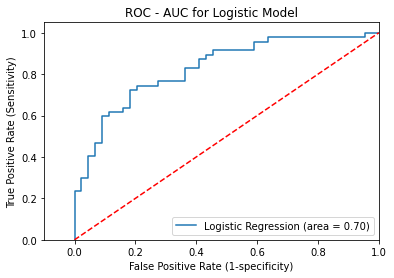

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC - AUC for Logistic Model')
plt.legend(loc="lower right")
plt.show()

**# Decision Tree Model**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df2=df[:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [ ]:
df2['sex']= LE.fit_transform(df2['sex'])
df2['cp']= LE.fit_transform(df2['cp'])
df2['fbs']= LE.fit_transform(df2['fbs'])
df2['restecg']= LE.fit_transform(df2['restecg'])
df2['exang']= LE.fit_transform(df2['exang'])
df2['slope']= LE.fit_transform(df2['slope'])
df2['ca']= LE.fit_transform(df2['ca'])
df2['thal']= LE.fit_transform(df2['thal'])
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,1,130,250.0,0,1,187.0,0,3.5,0,0,0,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,1,0,0,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,1,0,0,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,0,0,1,0
299,45,1,1,110,264.0,0,1,132.0,0,1.2,0,0,1,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,0,1,1,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,0,1,1,0


In [ ]:
X = df2.loc[:, df2.columns != 'target']
y = df2.loc[:, df2.columns == 'target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fit tree on train data
#model
clf = DecisionTreeClassifier()

In [ ]:
#Fit Classifier model on train set 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predict/estimate_train  X_train
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_train

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
#Predict/estimate_test  X_test
y_pred_test = clf.predict(X_test)

In [ ]:
y_pred_test

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
#See the train 
from sklearn import tree

[Text(180.20117647058825, 206.56799999999998, 'X[12] <= 0.5\ngini = 0.494\nsamples = 212\nvalue = [94, 118]'),
 Text(110.28705882352942, 184.824, 'X[9] <= 1.7\ngini = 0.303\nsamples = 118\nvalue = [22, 96]'),
 Text(78.7764705882353, 163.07999999999998, 'X[11] <= 0.5\ngini = 0.222\nsamples = 102\nvalue = [13, 89]'),
 Text(47.265882352941176, 141.336, 'X[0] <= 58.5\ngini = 0.139\nsamples = 80\nvalue = [6, 74]'),
 Text(31.51058823529412, 119.592, 'X[7] <= 156.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(23.632941176470588, 97.848, 'X[3] <= 129.0\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(15.75529411764706, 76.10399999999998, 'X[1] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(7.87764705882353, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(23.632941176470588, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(31.51058823529412, 76.10399999999998, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(39.3882352941176

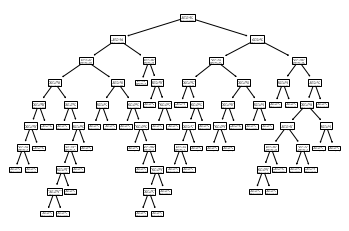

In [ ]:
tree.plot_tree(clf.fit(X_train, y_train))

In [ ]:
#Model has learnt unneccesaary things 
#Need to optimize

from sklearn.metrics import accuracy_score

In [ ]:
print(round(accuracy_score(y_train,y_pred_train), 2))

1.0


In [ ]:
print(round(accuracy_score(y_test,y_pred_test), 2))

0.66


In [ ]:
# Accuracy of train data is 1
# Accuracy of test data is 0.66

In [ ]:
from sklearn import tree

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
path

{'ccp_alphas': array([0.        , 0.00393082, 0.00408805, 0.0043239 , 0.0045283 ,
        0.00581761, 0.00628931, 0.0067086 , 0.006798  , 0.00707547,
        0.00754717, 0.00754717, 0.00808625, 0.00825472, 0.00934166,
        0.01027254, 0.01189882, 0.01479953, 0.01782345, 0.02469498,
        0.03423776, 0.16576779]),
 'impurities': array([0.        , 0.00786164, 0.02421384, 0.03286164, 0.05097484,
        0.10333333, 0.10962264, 0.11633124, 0.12312924, 0.13728018,
        0.14482735, 0.15237452, 0.16046078, 0.16871549, 0.18739882,
        0.19767136, 0.22146899, 0.25106805, 0.2688915 , 0.29358648,
        0.32782424, 0.49359203])}

In [ ]:
alphas = path['ccp_alphas']

In [ ]:
alphas

array([0.        , 0.00393082, 0.00408805, 0.0043239 , 0.0045283 ,
       0.00581761, 0.00628931, 0.0067086 , 0.006798  , 0.00707547,
       0.00754717, 0.00754717, 0.00808625, 0.00825472, 0.00934166,
       0.01027254, 0.01189882, 0.01479953, 0.01782345, 0.02469498,
       0.03423776, 0.16576779])

In [ ]:
acrcy_train, acrcy_test = [],[]

for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)    
    
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    acrcy_train.append(accuracy_score(y_train, y_pred_train))
    acrcy_test.append(accuracy_score(y_test,y_pred_test))

In [ ]:
acrcy_train

[1.0,
 0.9952830188679245,
 0.9858490566037735,
 0.9811320754716981,
 0.9716981132075472,
 0.9433962264150944,
 0.9386792452830188,
 0.9339622641509434,
 0.9292452830188679,
 0.9150943396226415,
 0.9056603773584906,
 0.9056603773584906,
 0.9056603773584906,
 0.9009433962264151,
 0.8915094339622641,
 0.8820754716981132,
 0.8679245283018868,
 0.839622641509434,
 0.8113207547169812,
 0.8018867924528302,
 0.7924528301886793,
 0.5566037735849056]

In [ ]:
acrcy_test

[0.7252747252747253,
 0.6813186813186813,
 0.7802197802197802,
 0.7582417582417582,
 0.8131868131868132,
 0.7912087912087912,
 0.8021978021978022,
 0.8131868131868132,
 0.7802197802197802,
 0.7802197802197802,
 0.7912087912087912,
 0.8021978021978022,
 0.8021978021978022,
 0.8021978021978022,
 0.8021978021978022,
 0.8021978021978022,
 0.7472527472527473,
 0.7472527472527473,
 0.7252747252747253,
 0.7142857142857143,
 0.7032967032967034,
 0.5164835164835165]

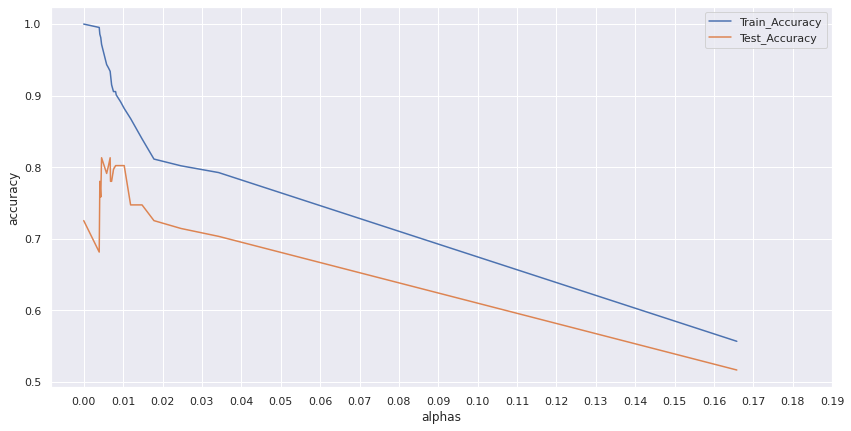

In [ ]:
# now we have scores
# lets, plot

sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y =acrcy_train, x = alphas, label = 'Train_Accuracy')
sns.lineplot(y =acrcy_test, x = alphas, label = 'Test_Accuracy')
plt.xticks(ticks=np.arange(0.00,0.2,0.01))
plt.xlabel('alphas')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#_________with ccp = 0.015
clf = DecisionTreeClassifier(ccp_alpha=0.015, random_state = 14)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, random_state=14)

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_train,y_pred_train), 2))

0.84


In [ ]:
print(round(accuracy_score(y_test,y_pred_test), 2))

0.75


In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[27 17]
 [ 6 41]]


In [ ]:
### Classification Report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70        44
           1       0.71      0.87      0.78        47

    accuracy                           0.75        91
   macro avg       0.76      0.74      0.74        91
weighted avg       0.76      0.75      0.74        91



In [ ]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
predictedProbability = clf.predict_proba(X_test)[:, 1]
fpr,tpr, thresholds = metrics.roc_curve(y_test, predictedProbability)

In [ ]:
fpr

array([0.        , 0.27272727, 0.38636364, 0.45454545, 0.52272727,
       1.        ])

In [ ]:
tpr

array([0.        , 0.70212766, 0.87234043, 0.91489362, 0.93617021,
       1.        ])

In [ ]:
thresholds

array([1.87254902, 0.87254902, 0.7       , 0.4375    , 0.125     ,
       0.10606061])

In [ ]:
dff = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc = auc(fpr,tpr)
auc

0.7712765957446808

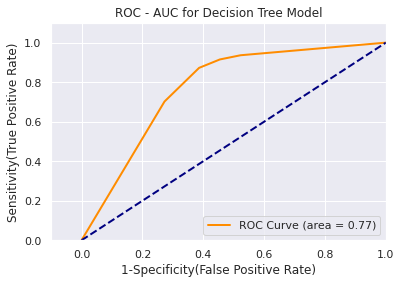

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC - AUC for Decision Tree Model")
plt.legend(loc = "lower right")
plt.show()

**# Random Forest**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df2=df[:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [ ]:
df2['sex']= LE.fit_transform(df2['sex'])
df2['cp']= LE.fit_transform(df2['cp'])
df2['fbs']= LE.fit_transform(df2['fbs'])
df2['restecg']= LE.fit_transform(df2['restecg'])
df2['exang']= LE.fit_transform(df2['exang'])
df2['slope']= LE.fit_transform(df2['slope'])
df2['ca']= LE.fit_transform(df2['ca'])
df2['thal']= LE.fit_transform(df2['thal'])
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,1,130,250.0,0,1,187.0,0,3.5,0,0,0,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,1,0,0,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,1,0,0,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,0,0,1,0
299,45,1,1,110,264.0,0,1,132.0,0,1.2,0,0,1,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,0,1,1,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,0,1,1,0


In [ ]:
X = df2.loc[:, df2.columns != 'target']
y = df2.loc[:, df2.columns == 'target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create Classifier object 
#in our previous experiment, we found ccp_alphas = 0.015 has the best accuarcy 
clf_rf = RandomForestClassifier(n_estimators =100, ccp_alpha= 0.015, random_state = 14)

In [ ]:
#fit the classifier with x and y  data = train
mod_rf = clf_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
#Prediction 
y_train_pred = mod_rf.predict(X_train)
y_train_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
#Prediction 
y_test_pred = mod_rf.predict(X_test)
y_test_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2))

0.9


In [ ]:
print(round(accuracy_score(y_test,y_test_pred), 2))

0.81


In [ ]:
#_____________________________ Extract Feature Importance 
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': mod_rf.feature_importances_}).\
    sort_values('importance', ascending = False)

In [ ]:
fi.head()

,feature,importance
12,thal,0.203829
11,ca,0.156076
9,oldpeak,0.115380
2,cp,0.113929
8,exang,0.100628


In [ ]:
# Accuarcy 2 cells above is 0.9 & 0.81 for Train & test (respectively)
# This accuracy is for having all columns as features in our model
# Lets build a model keeping 5 best features 
# that is keeping 'cp', 'exang', 'oldpeak', 'ca', 'thal' only
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create Classifier object 
#in our previous experiment Decision Tree model, 
#we found ccp_alphas = 0.035 has the best accuarcy 
clf_rf1 = RandomForestClassifier(n_estimators =100, ccp_alpha= 0.015, random_state = 14)

In [ ]:
# fit the classifier with x and y data=TRAIN, 
#this time with Failure_Type only
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 137 to 172
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 23.2 KB


In [ ]:
X_train1 = X_train.iloc[ : ,[2,8,9,11,12]]
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 137 to 172
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       212 non-null    int64  
 1   exang    212 non-null    int64  
 2   oldpeak  212 non-null    float64
 3   ca       212 non-null    int64  
 4   thal     212 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 9.9 KB


In [ ]:
mod_rf1 = clf_rf1.fit(X_train1, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
#Prediction 
y_train_pred1 = mod_rf1.predict(X_train1)
y_train_pred1

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 225 to 238
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       91 non-null     int64  
 1   sex       91 non-null     int64  
 2   cp        91 non-null     int64  
 3   trestbps  91 non-null     int64  
 4   chol      91 non-null     float64
 5   fbs       91 non-null     int64  
 6   restecg   91 non-null     int64  
 7   thalach   91 non-null     float64
 8   exang     91 non-null     int64  
 9   oldpeak   91 non-null     float64
 10  slope     91 non-null     int64  
 11  ca        91 non-null     int64  
 12  thal      91 non-null     int64  
dtypes: float64(3), int64(10)
memory usage: 10.0 KB


In [ ]:
X_test1 = X_test.iloc[ : ,[2,8,9,11,12]]
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 225 to 238
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       91 non-null     int64  
 1   exang    91 non-null     int64  
 2   oldpeak  91 non-null     float64
 3   ca       91 non-null     int64  
 4   thal     91 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 4.3 KB


In [ ]:
#Prediction 
y_test_pred1 = mod_rf1.predict(X_test1)
y_test_pred1

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(round(accuracy_score(y_train,y_train_pred1), 2))

0.86


In [ ]:
print(round(accuracy_score(y_test,y_test_pred1), 2))

0.81


In [ ]:
### There is no much difference in accuarcy 
#Earlier train accuracy = 0.9 now with 4 features its 0.86
#Earlier test accuracy = 0.81 now with 4 features its 0.81

In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_pred1)
print(confusion_matrix)

[[31 13]
 [ 4 43]]


In [ ]:
### Classification Report
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        44
           1       0.77      0.91      0.83        47

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [ ]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
predictedProbability1 = mod_rf1.predict_proba(X_test1)[:, 1]
fpr,tpr, thresholds = metrics.roc_curve(y_test, predictedProbability1)

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02272727, 0.06818182, 0.06818182, 0.09090909,
       0.09090909, 0.13636364, 0.13636364, 0.13636364, 0.15909091,
       0.15909091, 0.18181818, 0.18181818, 0.20454545, 0.20454545,
       0.22727273, 0.25      , 0.29545455, 0.29545455, 0.34090909,
       0.36363636, 0.56818182, 0.56818182, 0.63636364, 0.65909091,
       0.75      , 0.79545455, 0.84090909, 0.88636364, 0.93181818,
       0.97727273, 1.        ])

In [ ]:
tpr

array([0.        , 0.34042553, 0.36170213, 0.40425532, 0.46808511,
       0.4893617 , 0.5106383 , 0.55319149, 0.57446809, 0.59574468,
       0.61702128, 0.63829787, 0.68085106, 0.72340426, 0.72340426,
       0.76595745, 0.76595745, 0.78723404, 0.80851064, 0.85106383,
       0.87234043, 0.91489362, 0.91489362, 0.93617021, 0.93617021,
       0.95744681, 0.95744681, 0.9787234 , 0.9787234 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
thresholds

array([1.89541299, 0.89541299, 0.87927376, 0.87323944, 0.86817101,
       0.85796746, 0.84706323, 0.83106041, 0.82920144, 0.78756654,
       0.77792825, 0.76811059, 0.72797353, 0.71908852, 0.71394146,
       0.69817409, 0.69024108, 0.67850108, 0.66600645, 0.61190299,
       0.60839611, 0.51014379, 0.5002123 , 0.4982503 , 0.45813156,
       0.42562654, 0.28671954, 0.27201602, 0.20334771, 0.17894051,
       0.11768904, 0.11394835, 0.10070404, 0.09012524, 0.08501373,
       0.082074  , 0.081574  ])

In [ ]:
dff1 = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc1 = auc(fpr,tpr)
auc1

0.9008704061895552

In [ ]:
''' Area Under Curve is 0.9 '''

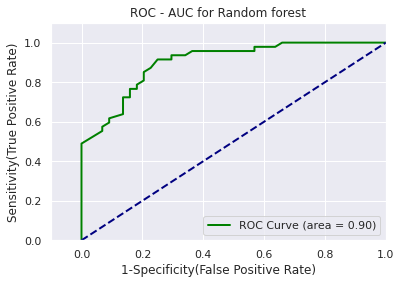

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'green',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc1)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC - AUC for Random forest")
plt.legend(loc = "lower right")
plt.show()

**# Gradient Boosting Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df2=df[:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [ ]:
df2['sex']= LE.fit_transform(df2['sex'])
df2['cp']= LE.fit_transform(df2['cp'])
df2['fbs']= LE.fit_transform(df2['fbs'])
df2['restecg']= LE.fit_transform(df2['restecg'])
df2['exang']= LE.fit_transform(df2['exang'])
df2['slope']= LE.fit_transform(df2['slope'])
df2['ca']= LE.fit_transform(df2['ca'])
df2['thal']= LE.fit_transform(df2['thal'])
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,1,130,250.0,0,1,187.0,0,3.5,0,0,0,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,1,0,0,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,1,0,0,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,0,0,1,0
299,45,1,1,110,264.0,0,1,132.0,0,1.2,0,0,1,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,0,1,1,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,0,1,1,0


In [ ]:
X = df2.loc[:, df2.columns != 'target']
y = df2.loc[:, df2.columns == 'target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
GB = GradientBoostingClassifier()

In [ ]:
GB_mod = GB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Prediction
y_train_GB = GB_mod.predict(X_train)
y_train_GB

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
# Prediction
y_test_GB = GB_mod.predict(X_test)
y_test_GB

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1])

In [ ]:
print(round(accuracy_score(y_train, y_train_GB), 2))

1.0


In [ ]:
print(round(accuracy_score(y_test, y_test_GB), 2))

0.81


In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_GB)
print(confusion_matrix)

[[33 11]
 [ 6 41]]


In [ ]:
### Classification Report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_GB))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



**# Knowing your Nearest Neighbours(KNN)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df2=df[:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [ ]:
df2['sex']= LE.fit_transform(df2['sex'])
df2['cp']= LE.fit_transform(df2['cp'])
df2['fbs']= LE.fit_transform(df2['fbs'])
df2['restecg']= LE.fit_transform(df2['restecg'])
df2['exang']= LE.fit_transform(df2['exang'])
df2['slope']= LE.fit_transform(df2['slope'])
df2['ca']= LE.fit_transform(df2['ca'])
df2['thal']= LE.fit_transform(df2['thal'])
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,1,130,250.0,0,1,187.0,0,3.5,0,0,0,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,1,0,0,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,1,0,0,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,0,0,1,0
299,45,1,1,110,264.0,0,1,132.0,0,1.2,0,0,1,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,0,1,1,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,0,1,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
X = df2.loc[:, df2.columns != 'target']
y = df2.loc[:, df2.columns == 'target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Building Model @ n_neighbors = 9

knn = KNeighborsClassifier(n_neighbors = 9)
print(knn) 
mpm_knn = knn.fit(X_train, y_train) 
print(mpm_knn)

KNeighborsClassifier(n_neighbors=9)
KNeighborsClassifier(n_neighbors=9)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Applying on Test data for prediction
y_pred_KNN = mpm_knn.predict(X_test)
print(y_pred_KNN)

[0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1]


In [ ]:
#Prediction Score
mpm_knn.score(X_test, y_test)

0.7142857142857143

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_KNN) 

0.7142857142857143

In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[27, 17],
       [ 9, 38]])

In [ ]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67        44
           1       0.69      0.81      0.75        47

    accuracy                           0.71        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



**# SVM**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df2= df[:]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [ ]:
df2['sex']= LE.fit_transform(df2['sex'])
df2['cp']= LE.fit_transform(df2['cp'])
df2['fbs']= LE.fit_transform(df2['fbs'])
df2['restecg']= LE.fit_transform(df2['restecg'])
df2['exang']= LE.fit_transform(df2['exang'])
df2['slope']= LE.fit_transform(df2['slope'])
df2['ca']= LE.fit_transform(df2['ca'])
df2['thal']= LE.fit_transform(df2['thal'])
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,1,130,250.0,0,1,187.0,0,3.5,0,0,0,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,1,0,0,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,1,0,0,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,0,0,1,0
299,45,1,1,110,264.0,0,1,132.0,0,1.2,0,0,1,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,0,1,1,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,0,1,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
X = df2.loc[:, df2.columns != 'target']
y = df2.loc[:, df2.columns == 'target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# splitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svm_model= svm.SVC(kernel='linear', C=1, gamma='auto', probability= True).fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_SVM = svm_model.predict(X_test)

In [ ]:
# model accuracy for X_test 
accuracy = svm_model.score(X_test, y_test)
print(accuracy)

0.8241758241758241


In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_SVM)
cm

array([[34, 10],
       [ 6, 41]])

In [ ]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.80      0.87      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



**# Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gnb_predictions = gnb.predict(X_test)

In [ ]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.8131868131868132


In [ ]:
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
cm

array([[35,  9],
       [ 8, 39]])

In [ ]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        44
           1       0.81      0.83      0.82        47

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

